In [1]:
import pandas as pd
import scipy.stats as st 

# For Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison as multi

In [2]:

# This .py loads and analyzes TSA travel throughput data from 2019-2020



import pandas as pd

import numpy as np

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.formula.api import ols

import scipy as cp

from scipy.stats import ttest_rel

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt



# This program takes 2 datasets, decides on best t-test, and returns values

def CleanColumnHeading(dfx):

# standardizes column header names

    dfx.rename({'2021 Traveler Throughput': 'travel2021'}, axis = 1, inplace = True)

    dfx.rename({'2020 Traveler Throughput': 'travel2020'}, axis = 1, inplace = True)

    dfx.rename({'2019 Traveler Throughput': 'travel2019'}, axis = 1, inplace = True)



# Your code to convert all column names to lower cases

    dfx.rename(columns = str.lower, inplace=True)



# Your code to change all spaces in column names to underscore

    dfx.rename(columns = {col: col.replace(' ','_') for col in dfx.columns}, inplace = True)

    return dfx



def EqualVar(arr1, arr2):

    EqualVar = True

    # print(arr1.std(),arr2.std())

    if arr1.std() > arr2.std():

        if arr1.std() / arr2.std() > 2:

            EqualVar = False

    else:

        if arr2.std() / arr1.std() > 2:

            EqualVar = False

    return EqualVar



    # Load data



In [3]:
df= pd.read_excel('tsa.xls')


df =CleanColumnHeading(df)


In [4]:
# Oneway ANOVA 
Results = st.f_oneway(df["travel2021"], df["travel2020"], df["travel2019"])

print ("ANOVA Results: ", Results)
Results.pvalue

ANOVA Results:  F_onewayResult(statistic=117.09506495567449, pvalue=1.4605962861436873e-18)


1.4605962861436873e-18

In [5]:
df_2021 = df[["travel2021"]].copy()
df_2021['grp']='travel2021'
df_2021.columns =['travellers','grp']
df_2020 = df[["travel2020"]].copy()
df_2020['grp']='travel2020'
df_2020.columns =['travellers','grp']
df_2019 = df[["travel2019"]].copy()
df_2019['grp']='travel2019'
df_2019.columns =['travellers','grp']
df_final = df_2019.append(df_2020).append(df_2021)

In [6]:
# Post Hoc
MultiComp = multi(df_final["travellers"], df_final["grp"])
PostHoc = MultiComp.tukeyhsd()
print(PostHoc)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1     group2     meandiff   p-adj      lower         upper     reject
----------------------------------------------------------------------------
travel2019 travel2020  -1418740.25  0.001 -1655067.2621 -1182413.2379   True
travel2019 travel2021 -308730.6875 0.0077  -545057.6996   -72403.6754   True
travel2020 travel2021 1110009.5625  0.001   873682.5504  1346336.5746   True
----------------------------------------------------------------------------


In [7]:




# Select Thanksgiving Week: Define as time from 14 - 29Nov2021, which is the first

tgv2021 = np.array(df.iloc[:15]["travel2021"])

tgv2020 = np.array(df.iloc[:15]["travel2020"])

tgv2019 = np.array(df.iloc[:15]["travel2019"])



# print(tgv2021, tgv2020, tgv2019)



# Run T-Test. Since datasets are of same length, we only check for equal variance

# Comparing 2021 vs 2020

#   Check for equal variance

equal_variance = EqualVar(tgv2021, tgv2020)

tTest = ttest_ind(tgv2021, tgv2020, equal_var = equal_variance)

results = tTest.statistic

Temp_P_Value = tTest.pvalue

print("Thanksgiving 2021 vs 2020 p-value: ", Temp_P_Value)



# Comparing 2021 vs 2019

#   Check for equal variance

equal_variance = EqualVar(tgv2021, tgv2019)

tTest = ttest_ind(tgv2021, tgv2019, equal_var = equal_variance)

results = tTest.statistic

Temp_P_Value = tTest.pvalue

print("Thanksgiving 2021 vs 2019 p-value: ", Temp_P_Value)



# Comparing 2020 vs 2019

#   Check for equal variance

equal_variance = EqualVar(tgv2020, tgv2019)

tTest = ttest_ind(tgv2020, tgv2019, equal_var = equal_variance)

results = tTest.statistic

Temp_P_Value = tTest.pvalue

print("Thanksgiving 2020 vs 2019 p-value: ", Temp_P_Value)


Thanksgiving 2021 vs 2020 p-value:  2.0170647109029665e-12
Thanksgiving 2021 vs 2019 p-value:  0.01498179656065141
Thanksgiving 2020 vs 2019 p-value:  1.4234506839643472e-14


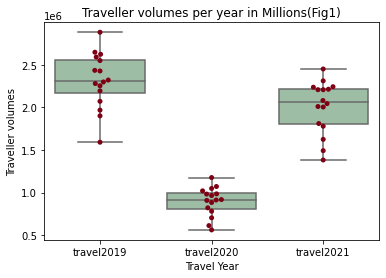

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='grp', y='travellers', data=df_final, color='#99c2a2')
ax = sns.swarmplot(x="grp", y="travellers", data=df_final, color='#7d0013')
ax.set_xlabel('Travel Year')
ax.set_ylabel('Traveller volumes')
ax.set_title('Traveller volumes per year in Millions(Fig1)')
plt.show()

Figure 1 shows box plots for average daily TSA traveler volume in 2019, 2020, and 2021.

